# LAB08 - WAVES

In this part of lab, you will practice comparing different types of waves (i.e. wave models) with real world data.


# Part 1: Define the wave models for use later

There are three surface wave models:
1. deep water waves whose speed depend on wavelength,
2. shallow water waves whose speed depend on water depth, and
3. all waves (deep, transition, and shallow water) with a more complicated model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def deep_wave_speed(wavelen):
    # Speed of a deep water wave.
    # See Segar Chapter 9, p. 217.
    # wavelen = wavelength [meters]
    g = 9.81 # accel. due to gravity, [m/s2]
    return np.sqrt(g*wavelen/(2*np.pi))
    
def shallow_wave_speed(depth):
    # Speed of a shallow water wave.
    # See Segar Chapter 9, p. 222.
    # depth = water depth [meters]
    g = 9.81
    return np.sqrt(g*depth)
    
def all_wave_speed(wavelen,depth):
    # Generalized wave speed equation.
    # See Kundu, Cohen, Dowling, Fluid Mechanics, 6th Ed., Academic Press, 2015, ISBN: 9780124059351, p. 190-200 
    # wavelen = wavelength [meters]
    # depth = water depth [meters]
    g = 9.81 # accel. due to gravity, [m/s2]
    return np.sqrt((g*wavelen/(2*np.pi))*np.tanh(2*np.pi*depth/wavelen))

# Step 2: Use the wave models
One way to do this is to recreate Segar Fig. 9-16

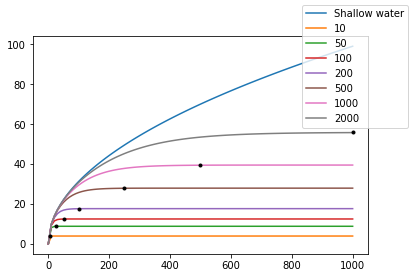

In [2]:
wavelengths = [10, 50, 100, 200, 500, 1000, 2000]
water_depths = np.linspace(0,2000/2,101)


# Initialize the plot
fig, ax = plt.subplots()

# Plot the shallow water waves which only depend on depth
ax.plot(
    water_depths,
    shallow_wave_speed(water_depths))

# Plot the more generalized waves
for wavelen in wavelengths:
    ax.plot(
        water_depths,
        all_wave_speed(wavelen,water_depths))

# Annotate the plot
# (Deep water waves are plotted after
# annotation because otherwise there
# would be even more legend entries...)
legend_labels = list(map(str,wavelengths))
legend_labels.insert(0,'Shallow water')
fig.legend(legend_labels)

# Plot the theoretical point at which deep water waves start
# (at the depth of the level of no motion, wavelen/2)
for wavelen in wavelengths:
    ax.plot(wavelen/2,
           deep_wave_speed(wavelen),'k.')

# Step 3: Load Data and overlay

Idea for activity: provide 4 waves datasets.  Classify each one as shallow or deep water waves.

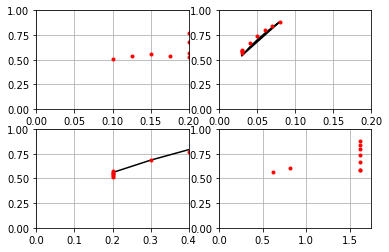

In [3]:
waves_1_depth = np.array([0.10, 0.125, 0.15, 0.175, 0.20, 0.20, 0.20, 0.20])
waves_1_period = np.array([0.39, 0.37, 0.36, 0.37, 0.35, 0.38, 0.44, 0.52])
waves_1_wavelen = np.array([0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.30, 0.40])

waves_2_depth = np.array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.03, 0.03, 0.03])
waves_2_period = np.array([2.75, 2.42, 2.19, 2.03, 1.93, 1.84, 1.09, 1.35, 2.75])
waves_2_wavelen = np.array([1.62, 1.62, 1.62, 1.62, 1.62, 1.62, 0.62, 0.81, 1.62])

fig, axs = plt.subplots(2,2)
axs[0,0].plot(waves_1_depth,waves_1_wavelen/waves_1_period,'r.')
axs[0,0].set_xlim([0,0.20])
axs[0,0].set_ylim([0,1])
axs[0,0].grid()
axs[1,0].plot(waves_1_wavelen,deep_wave_speed(waves_1_wavelen),'k-')
axs[1,0].plot(waves_1_wavelen,waves_1_wavelen/waves_1_period,'r.')
axs[1,0].set_xlim([0,0.40])
axs[1,0].set_ylim([0,1])
axs[1,0].grid()
axs[0,1].plot(waves_2_depth,shallow_wave_speed(waves_2_depth),'k-')
axs[0,1].plot(waves_2_depth,waves_2_wavelen/waves_2_period,'r.')
axs[0,1].set_xlim([0,0.20])
axs[0,1].set_ylim([0,1])
axs[0,1].grid()
axs[1,1].plot(waves_2_wavelen,waves_2_wavelen/waves_2_period,'r.')
axs[1,1].set_xlim([0,1.75])
axs[1,1].set_ylim([0,1])
axs[1,1].grid()

# Some sample statistics
Test the wave models by finding the mean difference between the observed wave speed and the theoretical (predicted) wave speed.  Here, we find the root mean squared difference (RMSD) since errors in the observational wave speed can result in values above and below the theoretical speed.

The results below suggest 3% and 5% errors for deep and shallow wave speeds, respectively.

In [4]:
waves_1_rmsd = np.sqrt(np.mean(((waves_1_wavelen/waves_1_period) - deep_wave_speed(waves_1_wavelen))**2))
print(waves_1_rmsd,100*waves_1_rmsd/0.75)

0.023601446913833056 3.146859588511074


In [5]:
waves_2_rmsd = np.sqrt(np.mean(((waves_2_wavelen/waves_2_period) - shallow_wave_speed(waves_2_depth))**2))
print(waves_2_rmsd,100*waves_2_rmsd/0.75)

0.037764782297058416 5.035304306274456
